<a href="https://colab.research.google.com/github/lucasoliveira13/Digital_Image_Processing/blob/main/PDI_Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Processamento de Imagens - Atividade 2

Grupo:
*   Lucas Matheus da Silva Oliveira
*   Guilherme Vilarim



##Inicializando Dataset

In [ ]:
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
import os
from collections import Counter

drive.mount('/content/drive')
dataset = '/content/drive/MyDrive/PDI/atividade_2'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Equalização de Histograma

In [ ]:
def instantiate_histogram():
    hist_array= []

    for i in range(0,256):
        hist_array.append(str(i))
        hist_array.append(0)

    hist_dct = {hist_array[i]: hist_array[i + 1] for i in range(0, len(hist_array), 2)}

    return hist_dct

def intensity_histogram(array_image,width,height):
    #calculando histograma
    occurrences = instantiate_histogram()
    for x in range(width):
      for y in range(height):
        occurrences[str(array_image[x][y])] += 1
    return occurrences

def probabilities_histogram(histogram,n):
    hist_prob = {}
    for i in range(len(histogram)):
      hist_prob[str(i)] = histogram[str(i)] / n
    return hist_prob

def accumulated_probability(probabilities_histogram):
    sum_prob = 0
    accumulated = {}
    for i in range(len(probabilities_histogram)):
      if i != 0:
        sum_prob += probabilities_histogram[str(i-1)]
      else:
        pass
      accumulated[str(i)] = probabilities_histogram[str(i)] + sum_prob
    return accumulated

def maping(accumulated_probability):
    new_map = {}
    #percorre cada valor de pixel
    for i in range(0,256):
        new_map[str(i)] = np.ceil(accumulated_probability[str(i)]*255)
    return new_map

def equalize(image,path):
    array_image = np.asarray(image)
    width = array_image.shape[0]
    height = array_image.shape[1]
    histogram = intensity_histogram(array_image,width,height)
    probabilities = probabilities_histogram(histogram,array_image.size)
    accumulated = accumulated_probability(probabilities)
    map = maping(accumulated)
    for x in range(width):
      for y in range(height):
        array_image[x][y] = map[str(array_image[x][y])]
    img.imsave(path,array_image,cmap='gray')
    return array_image


def plot_hist(hist, hist2=''):
    if hist2 != '':
        figure, axarr = plt.subplots(1,2, figsize=(20, 10))
        axarr[0].bar(hist.keys(), hist.values())
        axarr[1].bar(hist2.keys(), hist2.values())
    else:
        plt.bar(hist.keys(), hist.values())
        plt.xlabel("Intensity levels")
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        plt.grid(True)
        plt.show()

##Ajuste de Gamma

In [ ]:
import cv2

def calcule_gamma(image, gamma):
    normalized_image = image / 255.0
    adjusted_image = np.power(normalized_image, gamma)
    adjusted_image = adjusted_image * 255.0
    adjusted_image = np.round(adjusted_image).astype(np.uint8)
    return adjusted_image

def adjust_gamma(image,path,gamma):
    array_image = np.asarray(image)
    new_image = calcule_gamma(array_image,gamma)
    img.imsave(path,new_image,cmap='gray')



In [ ]:
def adjust_bright(image,value):
    if value < -255 or value > 255:
        raise ValueError("O valor de ajuste deve estar no intervalo -255 a 255.")

    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            intensidade = image[x, y]

            intensidade = max(0, min(255, intensidade + value))

            image[x, y] = intensidade

    return image

In [ ]:
def merging(image,path):
  reajusted_image = equalize(image,path)
  reajusted_image = adjust_bright(reajusted_image,value=10.2)
  img.imsave(path,reajusted_image,cmap='gray')

In [ ]:
file_path = '/content/drive/MyDrive/PDI/atividade_2/quest_2/Image_0.jpg'
final_path = '/content/drive/MyDrive/PDI/atividade_2/quest_2/result/Image_0_reajusted.jpg'
image = Image.open(file_path)
merging(image,final_path)

##Testes

In [ ]:
def plot_histograma(dictio):
    chaves = list(dictio.keys())
    valores = list(dictio.values())

    plt.bar(chaves, valores)
    plt.xlabel('Pixels')
    plt.ylabel('Ocorrencias')
    plt.title('Histograma')

    plt.show()



In [ ]:
#LEITURA DAS IMAGENS
data_original_quest_1 = []
data_equalized = []
data_gamma = []
gamma = 1

file_list = os.listdir(dataset)
i=0

for file_name in file_list:
    file_path = os.path.join(dataset, file_name)
    if os.path.isfile(file_path):
      print('Imagem->',file_name)
      image = Image.open(file_path)
      data_original_quest_1.append(image)
      final_path = f'/content/drive/MyDrive/PDI/atividade_2/resultados/{file_name}'
      final_path_gamma = f'/content/drive/MyDrive/PDI/atividade_2/resultados/gamma_{file_name}'
      equalize(image,final_path)
      data_equalized.append(Image.open(final_path))
      print('Salvando a imagem em->',final_path)
      if 'Escurecer' in file_name:
        gamma = 1.75
      else:
        gamma = 0.5
      adjust_gamma(image,final_path_gamma,gamma)
      data_gamma.append(Image.open(final_path_gamma))
      print('Salvando a imagem em->',final_path_gamma)
      i+=1

Imagem-> Clarear_0.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/atividade_2/resultados/Clarear_0.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/atividade_2/resultados/gamma_Clarear_0.jpg
Imagem-> Clarear_1.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/atividade_2/resultados/Clarear_1.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/atividade_2/resultados/gamma_Clarear_1.jpg
Imagem-> Clarear_2.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/atividade_2/resultados/Clarear_2.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/atividade_2/resultados/gamma_Clarear_2.jpg
Imagem-> Escurecer_0.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/atividade_2/resultados/Escurecer_0.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/atividade_2/resultados/gamma_Escurecer_0.jpg
Imagem-> Escurecer_1.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/atividade_2/resultados/Escurecer_1.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/atividade_2/result

In [ ]:
#LEITURA DAS IMAGENS
data_brilho = []
data_original_quest_2 = []
quest_2_path = '/content/drive/MyDrive/PDI/atividade_2/quest_2'
file_list = os.listdir(quest_2_path)
print(file_list)
i=0

for file_name in file_list:
    file_path = os.path.join(quest_2_path, file_name)
    print(file_path)
    if os.path.isfile(file_path):
      print('Imagem->',file_name)
      image = Image.open(file_path)
      data_original_quest_2.append(image)
      final_path = f'/content/drive/MyDrive/PDI/atividade_2/quest_2/result/{file_name}'
      merging(image,final_path)
      data_brilho.append(Image.open(final_path))
      print('Salvando a imagem em->',final_path)
      i+=1

['Image_0.jpg', 'Image_1.jpg', 'Image_2.jpg', 'Image_3.jpg', 'Image_4.jpg', 'Image_5.jpg', 'result']
/content/drive/MyDrive/PDI/atividade_2/quest_2/Image_0.jpg
Imagem-> Image_0.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/atividade_2/quest_2/result/Image_0.jpg
/content/drive/MyDrive/PDI/atividade_2/quest_2/Image_1.jpg
Imagem-> Image_1.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/atividade_2/quest_2/result/Image_1.jpg
/content/drive/MyDrive/PDI/atividade_2/quest_2/Image_2.jpg
Imagem-> Image_2.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/atividade_2/quest_2/result/Image_2.jpg
/content/drive/MyDrive/PDI/atividade_2/quest_2/Image_3.jpg
Imagem-> Image_3.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/atividade_2/quest_2/result/Image_3.jpg
/content/drive/MyDrive/PDI/atividade_2/quest_2/Image_4.jpg
Imagem-> Image_4.jpg
Salvando a imagem em-> /content/drive/MyDrive/PDI/atividade_2/quest_2/result/Image_4.jpg
/content/drive/MyDrive/PDI/atividade_2/quest_2/Image_5

##Resultados

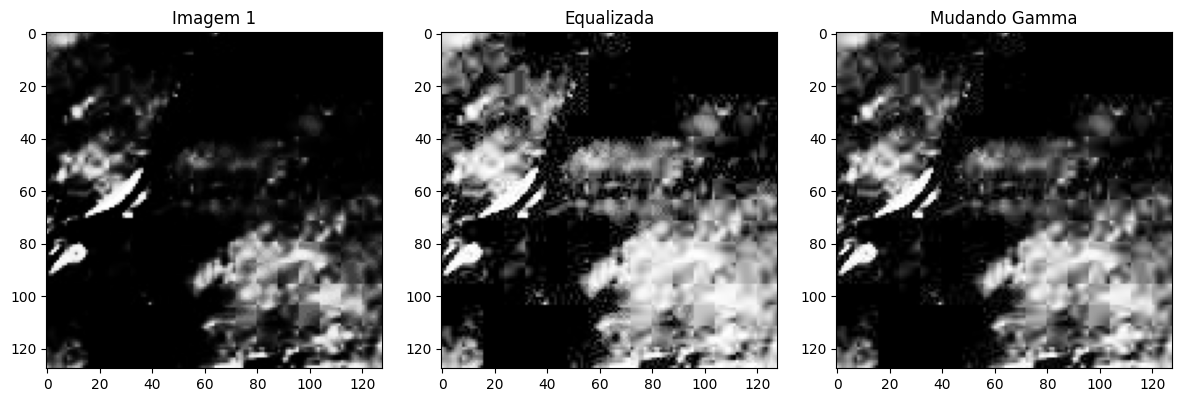

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(data_original_quest_1[0], cmap='gray')
axs[0].set_title('Imagem 1')

axs[1].imshow(data_equalized[0], cmap='gray')
axs[1].set_title('Equalizada')

axs[2].imshow(data_gamma[0], cmap='gray')
axs[2].set_title('Mudando Gamma')

plt.tight_layout()

plt.show()

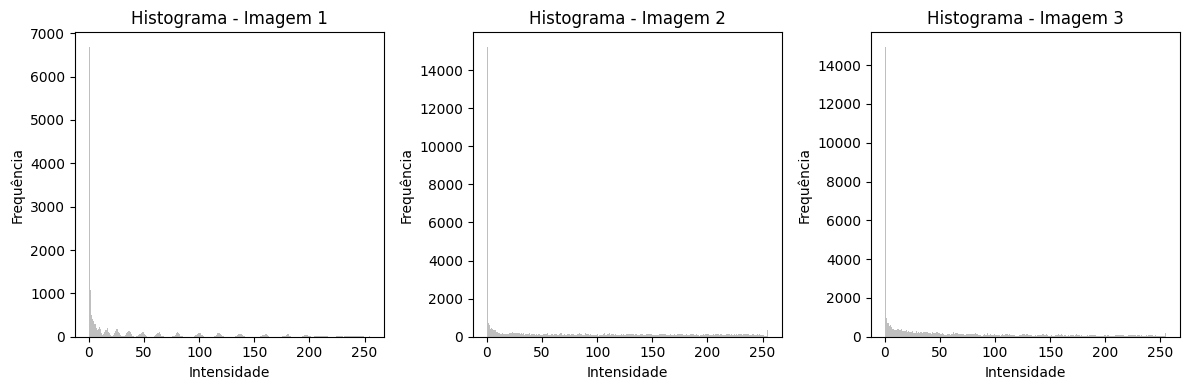

In [ ]:
import matplotlib.pyplot as plt

def plot_histograma(imagem1, imagem2, imagem3):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    axs[0].hist(imagem1.flatten(), bins=256, color='gray', alpha=0.5)
    axs[0].set_title('Histograma - Imagem 1')
    axs[0].set_xlabel('Intensidade')
    axs[0].set_ylabel('Frequência')

    axs[1].hist(imagem2.flatten(), bins=256, color='gray', alpha=0.5)
    axs[1].set_title('Histograma - Imagem 2')
    axs[1].set_xlabel('Intensidade')
    axs[1].set_ylabel('Frequência')

    axs[2].hist(imagem3.flatten(), bins=256, color='gray', alpha=0.5)
    axs[2].set_title('Histograma - Imagem 3')
    axs[2].set_xlabel('Intensidade')
    axs[2].set_ylabel('Frequência')

    plt.tight_layout()
    plt.show()

plot_histograma(np.asarray(data_original_quest_1[0]),np.asarray(data_equalized[0]),np.asarray(data_gamma[0]))

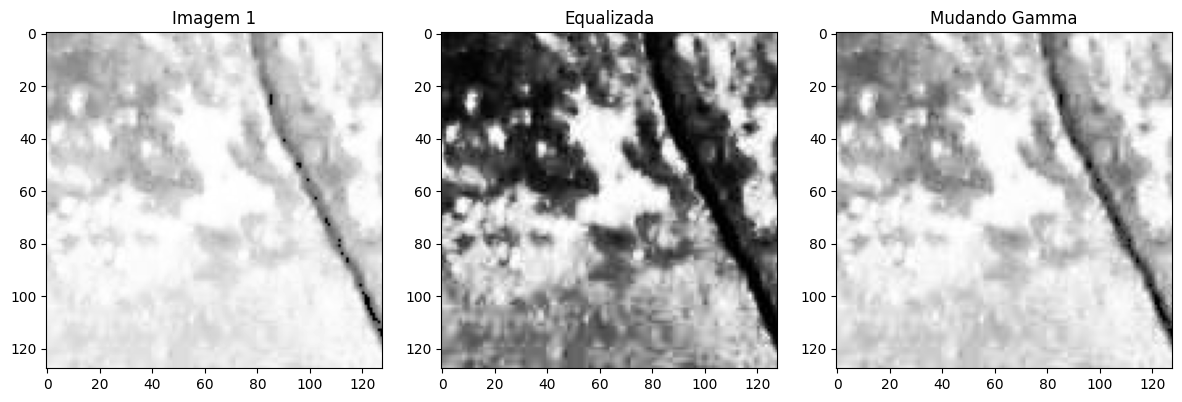

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(data_original_quest_1[3], cmap='gray')
axs[0].set_title('Imagem 1')

axs[1].imshow(data_equalized[3], cmap='gray')
axs[1].set_title('Equalizada')

axs[2].imshow(data_gamma[3], cmap='gray')
axs[2].set_title('Mudando Gamma')

plt.tight_layout()

plt.show()

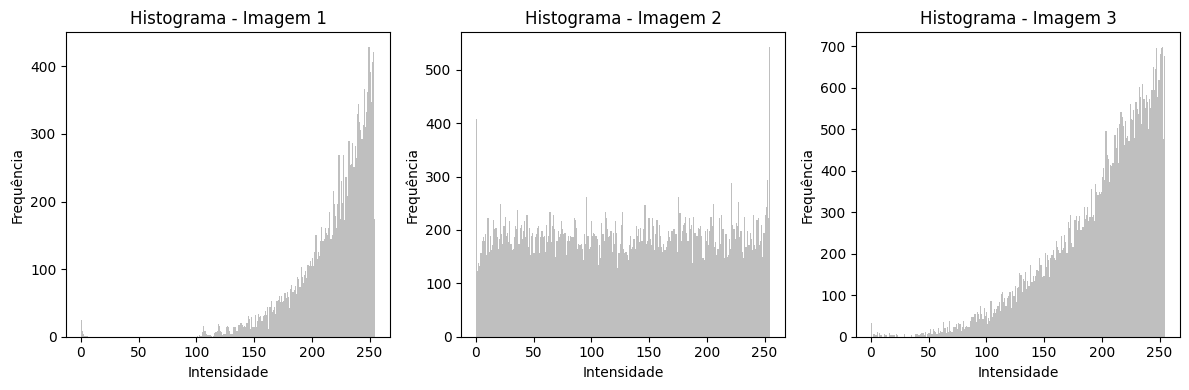

In [ ]:
plot_histograma(np.asarray(data_original_quest_1[3]),np.asarray(data_equalized[3]),np.asarray(data_gamma[3]))

In [ ]:
def plot_histograma_2(imagem1, imagem2):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    axs[0].hist(imagem1.flatten(), bins=256, color='gray', alpha=0.5)
    axs[0].set_title('Histograma - Imagem 1')
    axs[0].set_xlabel('Intensidade')
    axs[0].set_ylabel('Frequência')

    axs[1].hist(imagem2.flatten(), bins=256, color='gray', alpha=0.5)
    axs[1].set_title('Histograma - Imagem 2')
    axs[1].set_xlabel('Intensidade')
    axs[1].set_ylabel('Frequência')

    plt.tight_layout()
    plt.show()

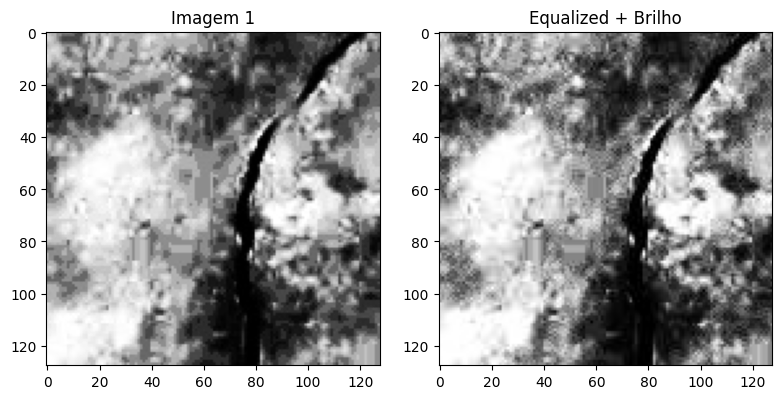

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(data_original_quest_2[2], cmap='gray')
axs[0].set_title('Imagem 1')

axs[1].imshow(data_brilho[2], cmap='gray')
axs[1].set_title('Equalized + Brilho')

plt.tight_layout()

plt.show()

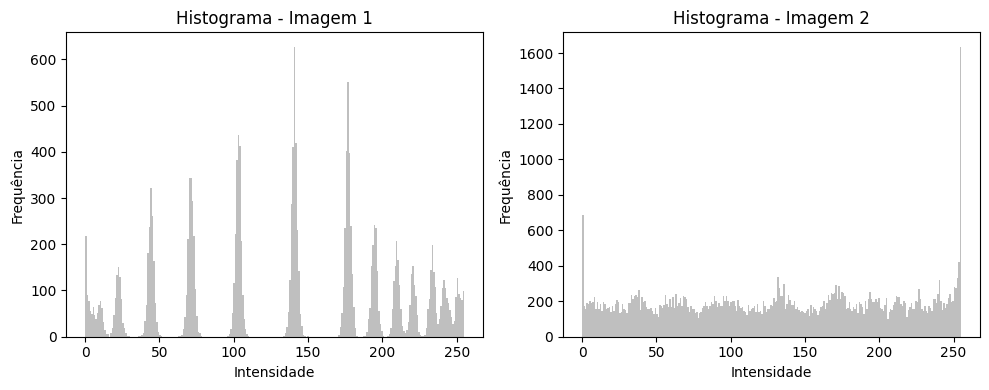

In [ ]:
plot_histograma_2(np.asarray(data_original_quest_2[2]),np.asarray(data_brilho[2]))